# Netflix Insights and  Data Analysis:


###  Tools used for Analzing Data :  Python,Machine Leaning,Excel.
###   About Dataset :  
* Analyzing Netflix data is a fascinating project that provides insights into viewing trends, popular genres, and other metrics. Let’s create a step-by-step guide for a Netflix dataset analysis.The goal is to explore the dataset, derive insights, and prepare for potential machine learning tasks. This project involves loading, cleaning, analyzing, and visualizing data from a Netflix dataset.
### Name of the Dataset:

### In this project, we:
1. Cleaned the data by handling missing values, removing duplicates, and
converting data types.
2. Explored the data through various visualizations such as bar plots and word
clouds.
3. Analyzed content trends over time, identified popular genres, and highlighted
top directors,highlighted country with highest number of comedy movies,average duration of movies etc .

### Data Cleaning

We are going to:
1. Treat the Nulls
2. Treat the duplicates
3. Populate missing rows
4. Drop unneeded columns
5. Split columns

### Step1: import Required Libraries

In [225]:
import pandas as pd   #
import numpy as np    #
import seaborn as sns              #
import matplotlib.pyplot as plt
import os
#from wordcloud import WordCloud

### Step2 : Load The Dataset

In [226]:
#Load the dataset
data = pd.read_csv('Netflix_title.csv')

In [180]:
#Display The First Few Rows of The Dataset
print(data.head())

  show_id     type                             title         director  \
0      s1    Movie              Dick Johnson Is Dead  Kirsten Johnson   
1      s3  TV Show                         Ganglands  Julien Leclercq   
2      s6  TV Show                     Midnight Mass    Mike Flanagan   
3     s14    Movie  Confessions of an Invisible Girl    Bruno Garotti   
4      s8    Movie                           Sankofa     Haile Gerima   

         country date_added  release_year rating  duration  \
0  United States  9/25/2021          2020  PG-13    90 min   
1         France  9/24/2021          2021  TV-MA  1 Season   
2  United States  9/24/2021          2021  TV-MA  1 Season   
3         Brazil  9/22/2021          2021  TV-PG    91 min   
4  United States  9/24/2021          1993  TV-MA   125 min   

                                           listed_in  
0                                      Documentaries  
1  Crime TV Shows, International TV Shows, TV Act...  
2                 TV Dr

### Step3: Data Cleaning 

In [181]:
# Check for missing values
print(data.isnull().sum())

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64


In [182]:
# #Drop duplicates if any
data.drop_duplicates(inplace=True)

# #Drop Rows wih missing critical information
data.dropna(subset=['director', 'type', 'country'],inplace=True)


# #Convert 'date_added' to date_time
data['date_added']=pd.to_datetime(data['date_added'])

In [183]:
#Show datatypes to confirm changes
print(data.dtypes)

show_id                 object
type                    object
title                   object
director                object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
dtype: object


### Step4 : Exploratory Data Analysis(EDA)


#### 1. Content Type Distribution: ('Movies vs TV shows')


In [184]:
#count the number of Movies and TV Shows
type_counts=data['type'].value_counts()
type_counts

Movie      6126
TV Show    2664
Name: type, dtype: int64

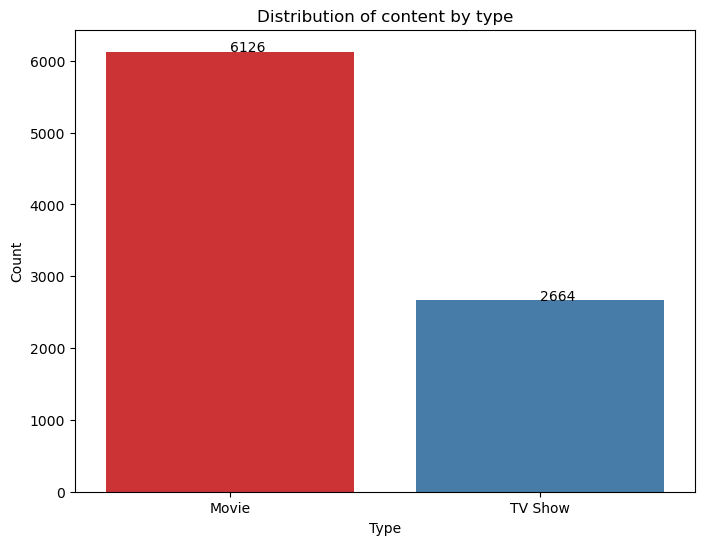

In [185]:
#Plot The Distribution
plt.figure(figsize=(8,6))
x=type_counts.index
y=type_counts.values
sns.barplot(x=type_counts.index,y=type_counts.values,palette='Set1')
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])
addlabels(x,y)
plt.title("Distribution of content by type")
plt.xticks(rotation='horizontal')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()


### Step 6: Next Steps

* Feature Engineering: Create new features, such as counting the number of genres per movie or extracting the duration in minutes.

* Machine Learning: Use the cleaned and processed data to build models for recommendations or trend predictions.

* Advanced Visualization: Use interactive plots or dashboards for more detailed analys.

### 2. Most Common Genres

In [186]:
# Split the 'listed_in' column and count genre
data['genres'] = data['listed_in'].apply(lambda x: x.split(','))
all_genres = sum(data['genres'], [])
genre_counts = pd.Series(all_genres).value_counts().head(10)

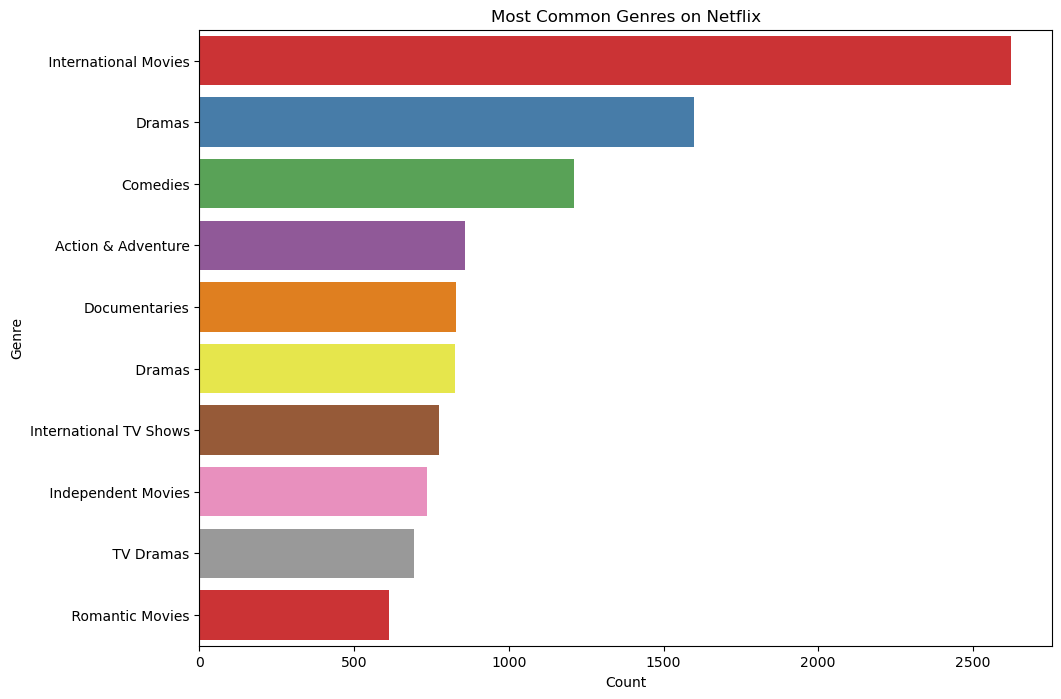

In [187]:
# Plot the most common genres
plt.figure(figsize=(11, 8))
x=genre_counts.values
y=genre_counts.index
sns.barplot(x=genre_counts.values, y=genre_counts.index,palette='Set1')
# def addlabels(x,y):
#     for i in range(len(y)):
#         plt.text(i,x[i],x[i])
# addlabels(x,y)
plt.title('Most Common Genres on Netflix')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

### 3. Content Added Over Time

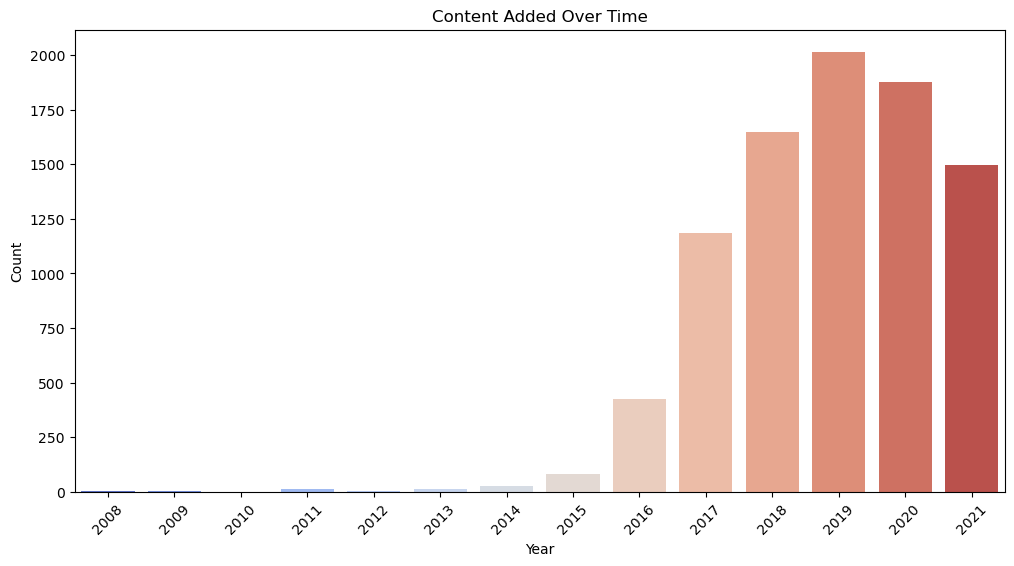

In [188]:
# Extract year and month from 'date_added'
data['year_added'] = data['date_added'].dt.year
data['month_added'] = data['date_added'].dt.month
# Plot content added over the years
plt.figure(figsize=(12, 6))
sns.countplot(x='year_added', data=data, palette='coolwarm')
plt.title('Content Added Over Time')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


### 4. Top 10 Directors with the Most Titles

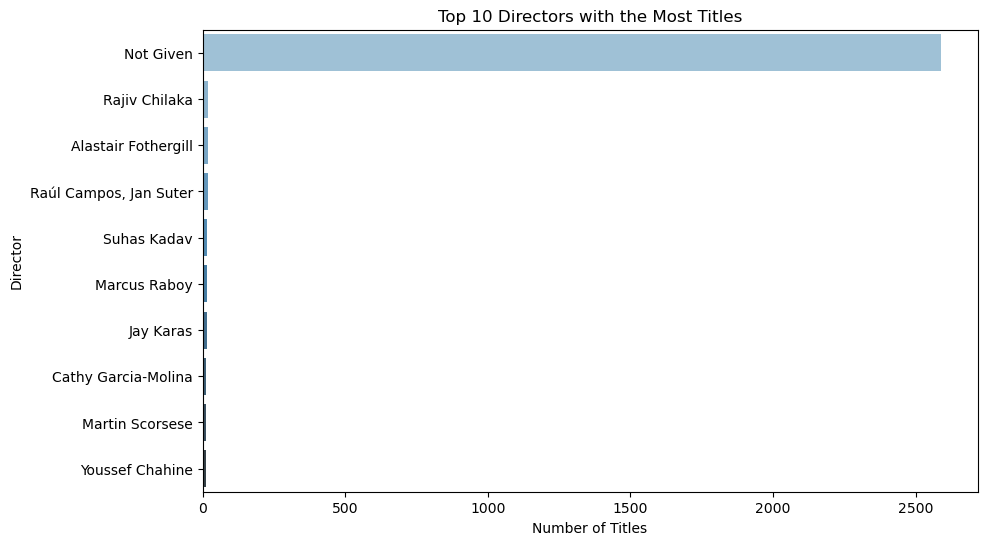

In [189]:
# Count titles by director
top_directors = data['director'].value_counts().head(10)
# Plot top directors
plt.figure(figsize=(10, 6))
sns.barplot(x=top_directors.values, y=top_directors.index,
palette='Blues_d')
plt.title('Top 10 Directors with the Most Titles')
plt.xlabel('Number of Titles')
plt.ylabel('Director')
plt.show()

In [190]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8790 entries, 0 to 8789
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8790 non-null   object        
 1   type          8790 non-null   object        
 2   title         8790 non-null   object        
 3   director      8790 non-null   object        
 4   country       8790 non-null   object        
 5   date_added    8790 non-null   datetime64[ns]
 6   release_year  8790 non-null   int64         
 7   rating        8790 non-null   object        
 8   duration      8790 non-null   object        
 9   listed_in     8790 non-null   object        
 10  genres        8790 non-null   object        
 11  year_added    8790 non-null   int64         
 12  month_added   8790 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(9)
memory usage: 961.4+ KB


### 5. Visual representation of rating frequency of movies and TV Shows on Netflix.

In [191]:
data['rating'].value_counts()


TV-MA       3205
TV-14       2157
TV-PG        861
R            799
PG-13        490
TV-Y7        333
TV-Y         306
PG           287
TV-G         220
NR            79
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: rating, dtype: int64

In [192]:
data.describe()

,release_year,year_added,month_added
count,8790.000000,8790.000000,8790.000000
mean,2014.183163,2018.873606,6.655859
std,8.825466,1.573568,3.436103
min,1925.000000,2008.000000,1.000000
25%,2013.000000,2018.000000,4.000000
50%,2017.000000,2019.000000,7.000000
75%,2019.000000,2020.000000,10.000000
max,2021.000000,2021.000000,12.000000


### 6. The relationship between the rating and the type

In [193]:
import plotly.express as px
from plotly.offline import iplot , plot
from plotly.subplots import make_subplots

### 7. Monthly releases of Movies and TV shows on Netflix


In [195]:
data['year']=data['date_added'].dt.year
data['month']=data['date_added'].dt.month
data['day']=data['date_added'].dt.day

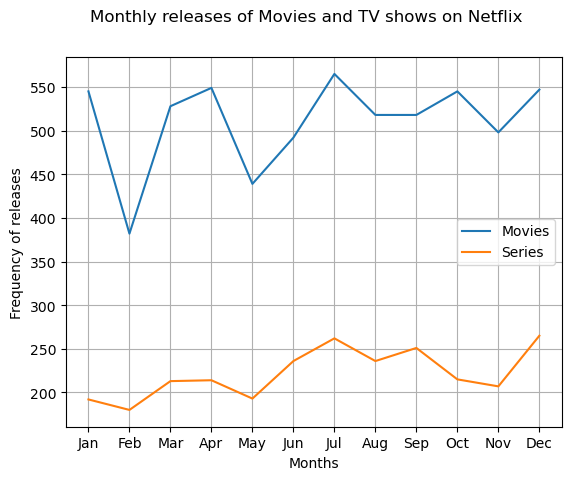

In [196]:
monthly_movie_release=data[data['type']=='Movie']['month'].value_counts().sort_index()
monthly_series_release=data[data['type']=='TV Show']['month'].value_counts().sort_index()

plt.plot(monthly_movie_release.index,
monthly_movie_release.values, label='Movies')
plt.plot(monthly_series_release.index,
monthly_series_release.values, label='Series')
plt.xlabel("Months")
plt.ylabel("Frequency of releases")
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May','Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend()
plt.grid(True)
plt.suptitle("Monthly releases of Movies and TV shows on Netflix")
plt.show()

### 8.Yearly releases of Movies and TV Shows on Netflix


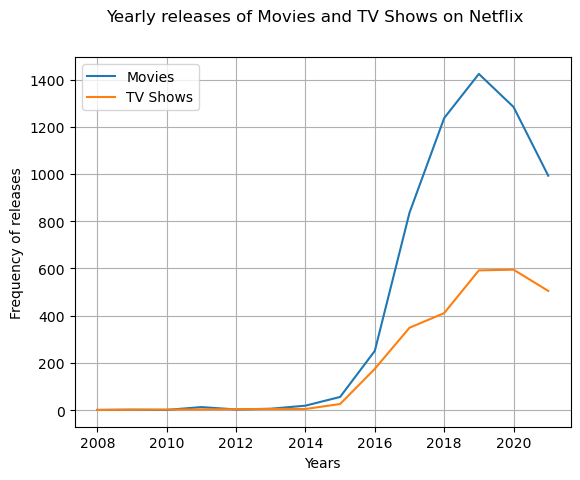

In [197]:
yearly_movie_releases=data[data['type']=='Movie']['year'].value_counts().sort_index()
yearly_series_releases=data[data['type']=='TV Show']['year'].value_counts().sort_index()
plt.plot(yearly_movie_releases.index,
yearly_movie_releases.values, label='Movies')
plt.plot(yearly_series_releases.index,
yearly_series_releases.values, label='TV Shows')
plt.xlabel("Years")
plt.ylabel("Frequency of releases")
plt.grid(True)
plt.suptitle("Yearly releases of Movies and TV Shows on Netflix")
plt.legend()

### 9.Top 10 popular movie genres

In [198]:
popular_movie_genre=data[data['type']=='Movie'].groupby("listed_in").size().sort_values(ascending=False)[:10]
popular_series_genre=data[data['type']=='TV Show'].groupby("listed_in").size().sort_values(ascending=False)[:10]

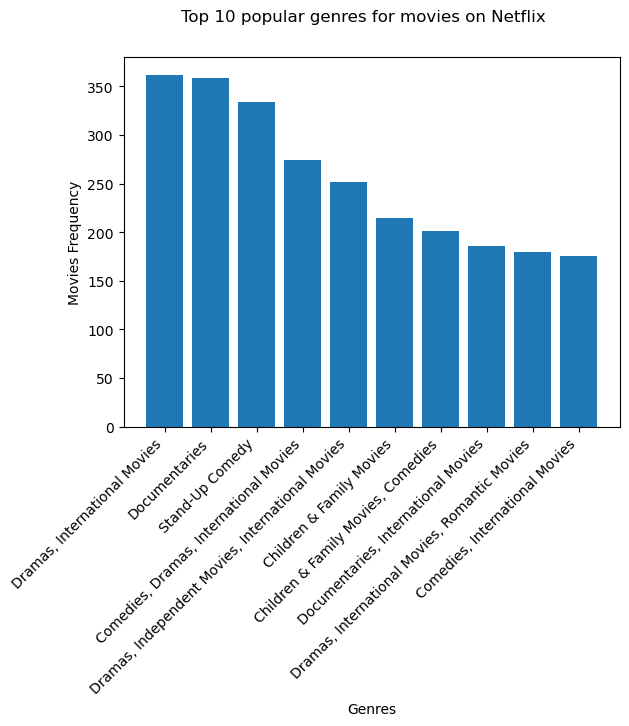

In [199]:
plt.bar(popular_movie_genre.index, popular_movie_genre.values)
plt.xticks(rotation=45, ha='right')
plt.xlabel("Genres")
plt.ylabel("Movies Frequency")
plt.suptitle("Top 10 popular genres for movies on Netflix")
plt.show()